This document is referring to the first course project of the COS "Applied Data Science: Machine Learning"
## Course Project Topic: World Happiness Report

- World Happiness Report 2017
- collected by the Gallup World Poll
- from more than 160 countries in over 140 languages
- aims to identify the key elements driving a peron's well-being

The enumerations are referring exactly to the list of tasks from EPFL.

## A. Importing, cleaning and numerical summaries

1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.set_index('Country', inplace=True)

3. Check the number of observations.

In [4]:
len(df.index)

153

3. Answer: 153 rows => 153 observations since the top row is referring to heading/labels instead of observations

4. Obtain the column headings.

In [235]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Generosity', 'Corruption', 'Dystopia', 'Job Satisfaction',
       'Region'],
      dtype='object')

In [237]:
list(df) # as an alternative

['Happiness Rank',
 'Happiness Score',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Generosity',
 'Corruption',
 'Dystopia',
 'Job Satisfaction',
 'Region']

5. Check the data type for each column.

In [6]:
df.dtypes

Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

5. Answer: Country & Region = object, Happiness Rank = int 64, Remaining columns = float64

6. Check if there are any missing values.

In [7]:
df.isnull().sum()

Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

6. Answer: there are 2 missing values in the column "Job Satisfaction"

7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.

In [8]:
df.dropna(inplace=True)

In [9]:
len(df.index)

151

In [239]:
print(df.shape) # as an alternative

(151, 11)


In [10]:
df['Happiness Rank'] = df['Happiness Rank'].astype('float64')

In [11]:
df.dtypes

Happiness Rank      float64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

7. Answer: 2 observations have been dropped and the data type of column 'Happiness Rank' has been changed to 'float64'. Working assumption: since the data type of 'Region' and 'Country' is 'String' Python cannot convert string to float. Converting the other columns from float to string does not make senes in order to analyze (numerical) data.

8. Obtain the mean, minimum and maximum value for each column containing numerical data.

In [241]:
df.describe().loc[['mean','min','max'],:] # or df.describe().iloc[[1,3,7],:]

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


9. List the 10 happiest countries, ordered by their happiness score.

In [13]:
df.sort_values('Happiness Score', ascending=False).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1.0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3.0,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5.0,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6.0,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7.0,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8.0,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Australia,10.0,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,89.2,Asia-Pacific


10. List the 10 least happy countries, ordered by their happiness score.

In [14]:
df.sort_values('Happiness Score', ascending=True).head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Central African Republic,155.0,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,70.4,Africa
Burundi,154.0,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,54.3,Africa
Tanzania,153.0,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,57.8,Africa
Syria,152.0,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,62.7,Asia-Pacific
Rwanda,151.0,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,51.7,Africa
Togo,150.0,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,44.8,Africa
Guinea,149.0,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,55.1,Africa
Liberia,148.0,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,56.6,Africa
Yemen,146.0,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,58.9,Asia-Pacific


## B. Indexing and grouping

1. Group the data points by region and save them into separate .csv files ex. a Western Europe.csv with all the data for countries in Western Europe and so on for the other 5 regions.

In [15]:
df.groupby('Region').size()

Region
Africa            43
Asia-Pacific      43
Eastern Europe    21
Europe             1
Latin America     22
North America      2
Western Europe    19
dtype: int64

There is one row assigned to the region "Europe" instead of either Eastern or Western Europe. However since I am a data analyst it's not my call to decide which attribute belongs to a data set. Therefore I will leave out this row (the effect on analysis can be neglected because there is only 1 unassigned row.

In [244]:
df[df['Region'] == 'Africa'] # as an alternative to the codes below

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Zimbabwe,138.0,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
Egypt,104.0,4.735,0.989702,0.997471,0.520187,0.282110,0.128631,0.114381,1.702161,75.1,Africa
Senegal,115.0,4.535,0.479309,1.179692,0.409363,0.377922,0.183469,0.115460,1.789646,54.7,Africa
Botswana,142.0,3.766,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914,56.1,Africa
Cameroon,107.0,4.695,0.564305,0.946018,0.132892,0.430389,0.236298,0.051307,2.333646,64.9,Africa
Lesotho,139.0,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,44.4,Africa
South Africa,101.0,4.829,1.054699,1.384789,0.187080,0.479247,0.139362,0.072509,1.510909,61.3,Africa
Angola,140.0,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,71.1,Africa
Somalia,93.0,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,79.9,Africa


In [243]:
d1_Africa = df[['Africa' in str(x) for x in df['Region']]]

In [17]:
d2_Asia_Pacific = df[['Asia-Pacific' in str(x) for x in df['Region']]]

In [18]:
d3_Eastern_Europe = df[['Eastern Europe' in str(x) for x in df['Region']]]

In [19]:
d4_Western_Europe = df[['Western Europe' in str(x) for x in df['Region']]]

In [20]:
d5_Latin_America = df[['Latin America' in str(x) for x in df['Region']]]

In [21]:
d6_North_America = df[['North America' in str(x) for x in df['Region']]]

In [22]:
d1_Africa.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d1_Africa.csv'
, encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d1_Africa.csv'

In [ ]:
d2_Asia_Pacific.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d2_Asia_Pacific.csv'
, encoding='utf-8')

In [ ]:
d3_Eastern_Europe.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d3_Eastern_Europe.csv'
, encoding='utf-8')

In [ ]:
d4_Western_Europe.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d4_Western_Europe.csv'
, encoding='utf-8')

In [ ]:
d5_Latin_America.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d5_Latin_America.csv'
, encoding='utf-8')

In [ ]:
d6_North_America.to_csv(path_or_buf='/Users/heyus/Desktop/EPFL_Data Science COS/EPFL/01. Course project/d6_North_America.csv'
, encoding='utf-8')

2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.

In [23]:
df.groupby('Region').mean().sort_values('Happiness Score', ascending=False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
North America,10.500000,7.154500,1.512732,1.450635,0.804422,0.558421,0.414059,0.211505,2.202689,87.900000
Western Europe,20.000000,6.880474,1.471893,1.485298,0.820159,0.546660,0.311760,0.231367,2.013270,90.310526
Latin America,50.772727,5.957818,1.006981,1.290156,0.611009,0.449222,0.210696,0.087764,2.301928,81.104545
Eastern Europe,70.619048,5.498952,1.178098,1.281235,0.681838,0.311535,0.170583,0.050637,1.825065,77.628571
Asia-Pacific,78.325581,5.358326,1.059272,1.167791,0.608605,0.429932,0.294002,0.148947,1.649736,77.834884
Africa,122.116279,4.254581,0.563714,0.970837,0.266773,0.356791,0.211645,0.100776,1.784001,61.193023
Europe,132.000000,4.096000,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,72.300000


3. Compute the number of countries in each region that have a happiness score above 6.0.

In [24]:
df[df.loc[:,'Happiness Score']>6.00].groupby('Region').count()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
Asia-Pacific,11,11,11,11,11,11,11,11,11,11
Eastern Europe,1,1,1,1,1,1,1,1,1,1
Latin America,13,13,13,13,13,13,13,13,13,13
North America,2,2,2,2,2,2,2,2,2,2
Western Europe,17,17,17,17,17,17,17,17,17,17


For example Asia Pacific counts 11 countries with a happiness score above 6.0

4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [25]:
df_difference = df.groupby('Region').max() - df.groupby('Region').min()

In [26]:
df_difference.sort_values('Happiness Score', ascending=False)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Region,,,,,,,,,,
Asia-Pacific,144.0,3.852,1.503655,1.152867,0.768746,0.576709,0.809268,0.448991,2.382368,43.0
Latin America,133.0,3.476,0.992746,0.866835,0.542159,0.549762,0.424184,0.169097,1.579174,41.6
Africa,102.0,3.179,1.198210,1.384789,0.638007,0.602127,0.412650,0.429884,2.739571,41.6
Western Europe,88.0,2.342,0.426768,0.243531,0.134517,0.378972,0.486624,0.384901,1.344179,15.3
Eastern Europe,69.0,1.454,0.627067,0.701374,0.303263,0.476845,0.328867,0.183249,1.811669,20.2
North America,7.0,0.323,0.067055,0.061428,0.060271,0.105360,0.042961,0.151733,0.030849,5.2
Europe,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Asia-pacific has with 3.852 the largest range of happiness score

## C. Bar plot of the Happiness Score

Obtain a **horizontal** bar plot of the Happiness Score of the top 10 happiest countries. Your bar chart should have the names of the countries are listed vertically along the 
$y$
-axis and the 
$x$
-axis should have labels for each number from 
0
 to 
8
. Ensure that the chart has an appropriate title and labels.

In [27]:
df_sorted = df.sort_values('Happiness Score', ascending=False)

In [28]:
values = df_sorted[0:10]['Happiness Score']

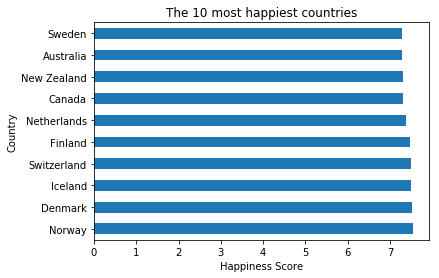

In [29]:
bar_plot = values.plot.barh()
bar_plot.set_title('The 10 most happiest countries')
bar_plot.set_xlabel('Happiness Score');

2. You will now adapt the code for the horizontal bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:
- Economy
- Family
- Health
- Freedom
- Generosity
- Corruption
- Dystopia

  Choose a distinct color for each category and include an appropriate legend with your chart.

In [30]:
values_2 = df_sorted.loc['Norway':'Sweden','Economy':'Dystopia']

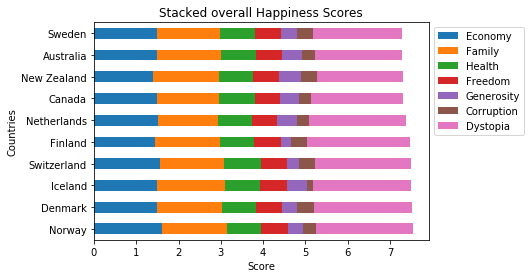

In [251]:
values_2.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1,1)) # avoid the legend from overlapping with the barplot.
plt.xlabel('Score')
plt.ylabel('Countries')
plt.title('Stacked overall Happiness Scores')
plt.show();

3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

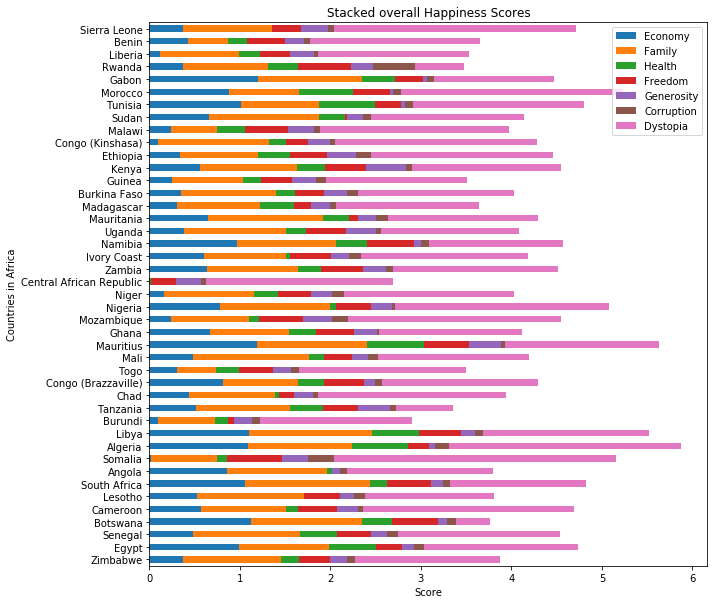

In [32]:
df.loc[df['Region'] == 'Africa', 'Economy':'Dystopia'].plot(kind='barh',figsize=(10,10), stacked=True)
plt.legend(['Economy','Family', 'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia'], loc='upper right')
plt.xlabel('Score')
plt.ylabel('Countries in Africa')
plt.title('Stacked overall Happiness Scores')
plt.show();

## D. Histogram of Job Satisfaction

1. Obtain a histogram of the Job Satisfaction using the following categories:

- 40%-50%
- 50%-60%
- 60%-70%
- 70%-80%
- 80%-90%
- 90%-100%

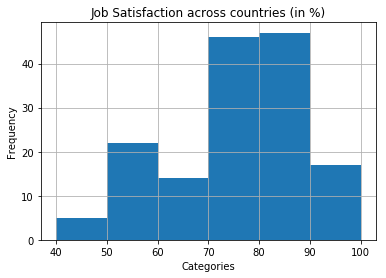

In [254]:
df.hist(column='Job Satisfaction', bins=[40,50,60,70,80,90,100])
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Job Satisfaction across countries (in %)')
plt.show();

## E. Pairwise Scatter plots

1. Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as opposed to separate commands for each plot.

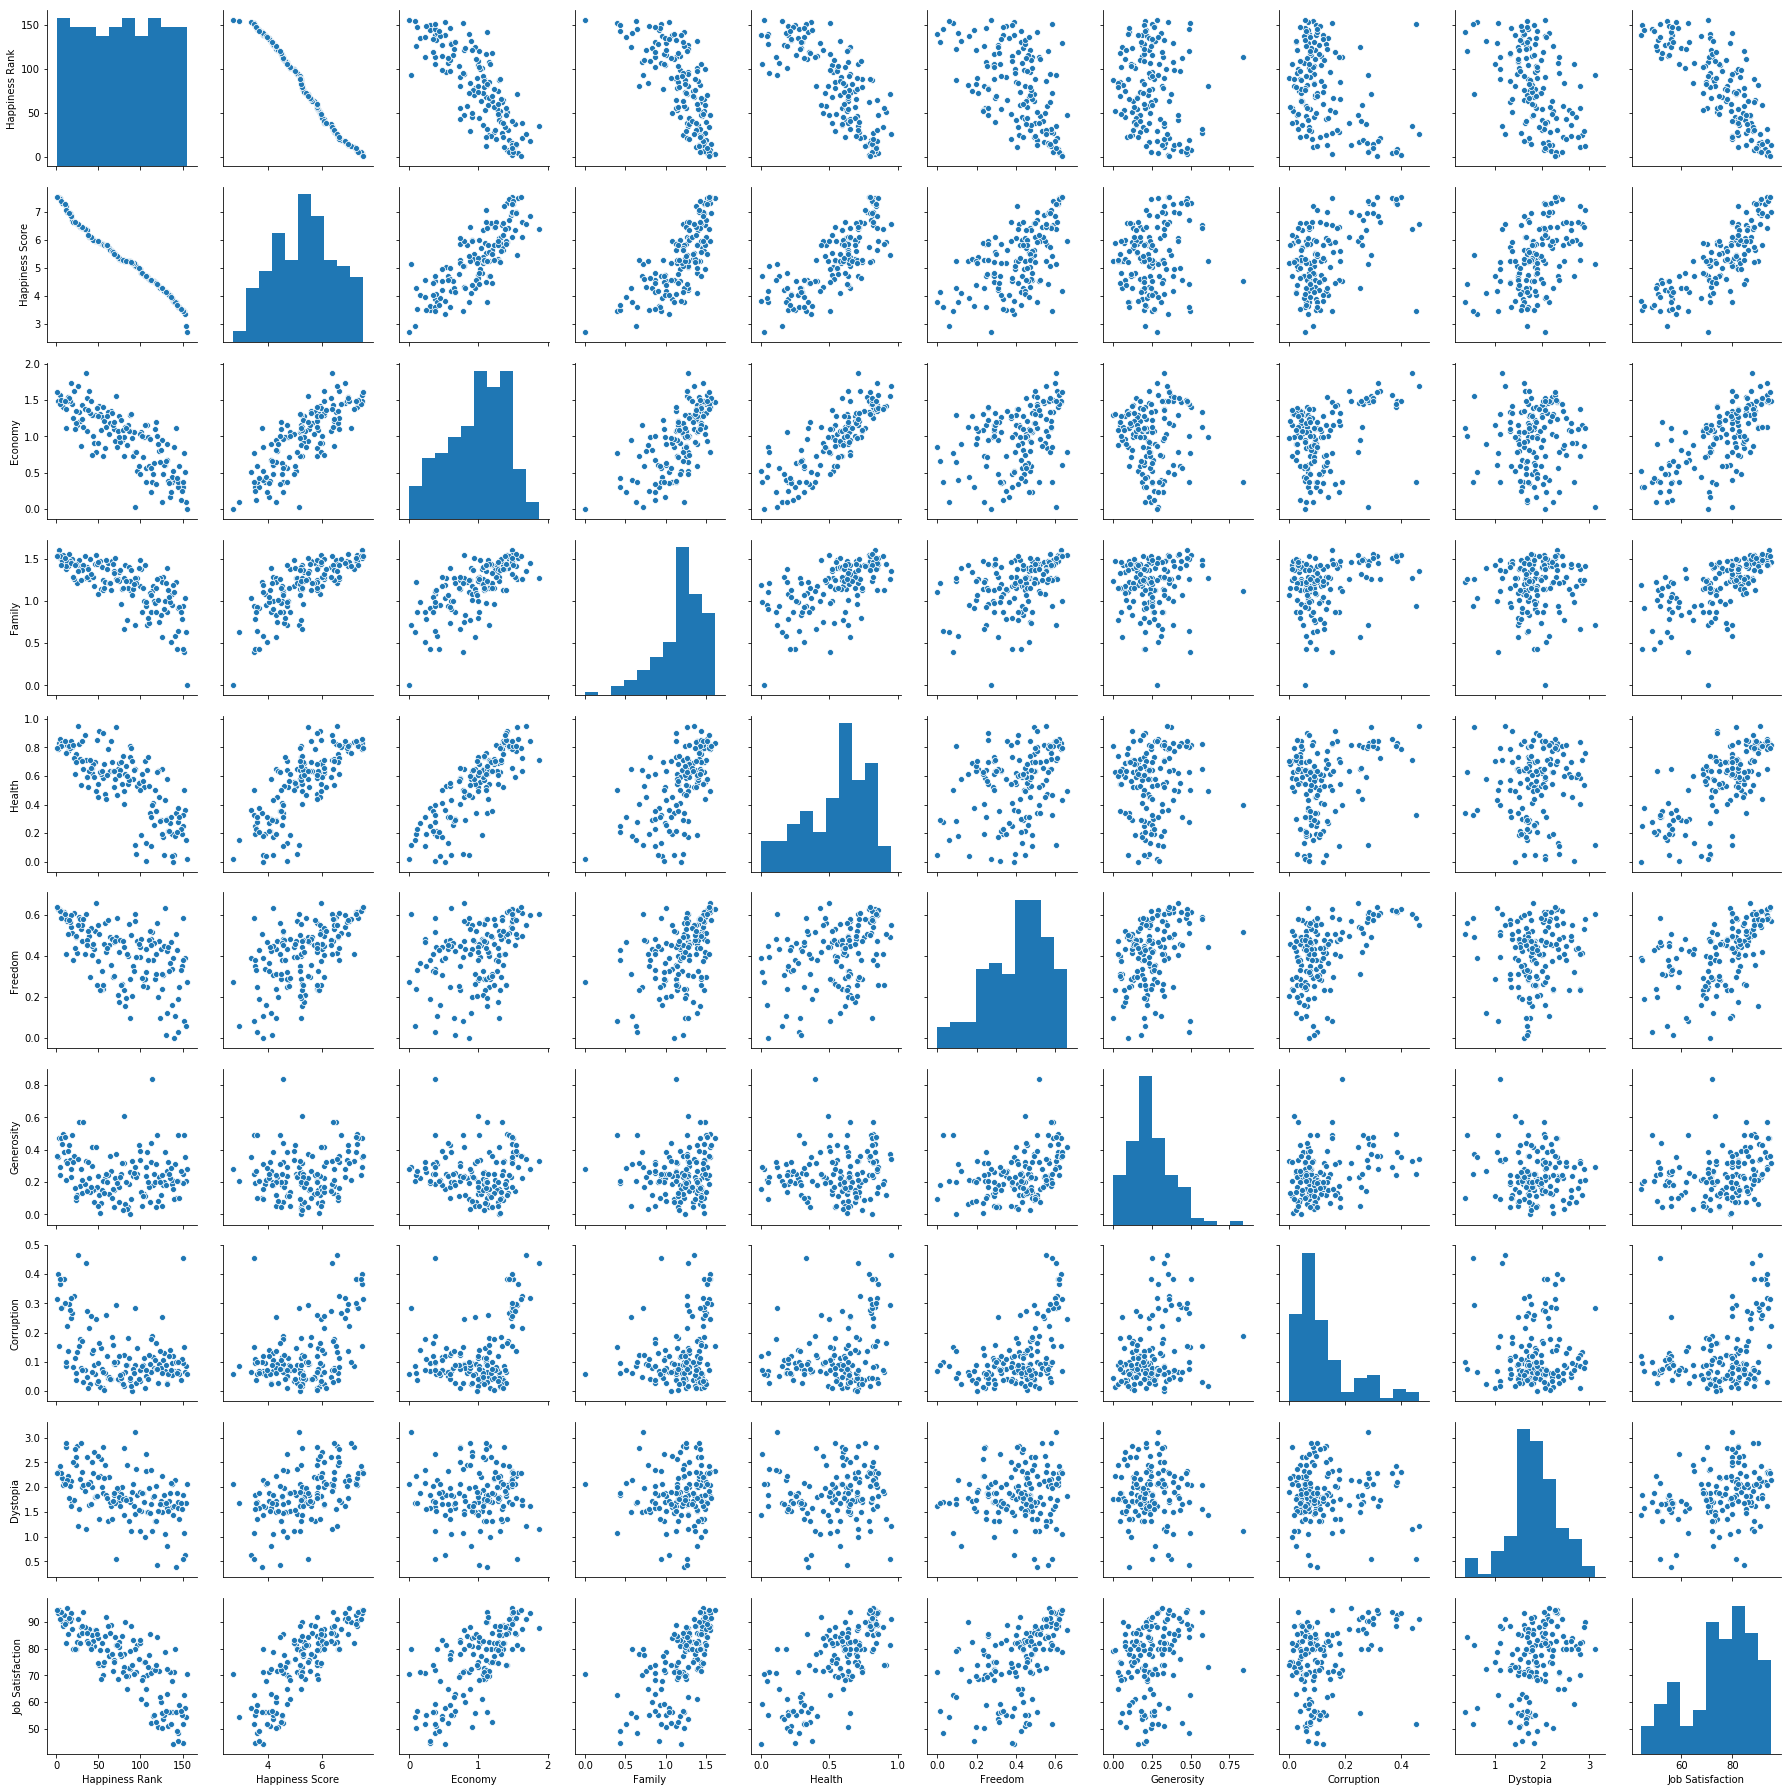

In [34]:
sns.pairplot(df);

- Create a non-squared plot using the x/y_vars keywords.
- Add further insight by colouring by region.

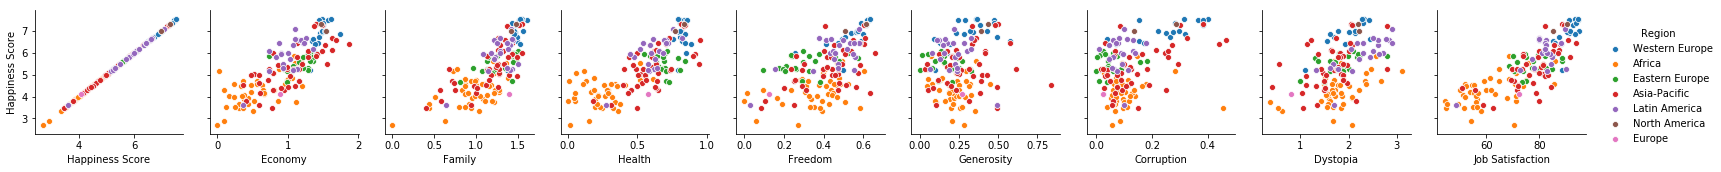

In [255]:
sns.pairplot(df,
            x_vars = ['Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction'],
            y_vars = 'Happiness Score',
            hue = 'Region')

## F. Correlation

1. Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [35]:
df.corr()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
Happiness Rank,1.000000,-0.992663,-0.809521,-0.733902,-0.776602,-0.550111,-0.142348,-0.415532,-0.489194,-0.814535
Happiness Score,-0.992663,1.000000,0.808678,0.749612,0.777731,0.567948,0.164123,0.438262,0.481117,0.812873
Economy,-0.809521,0.808678,1.000000,0.685524,0.838884,0.363843,-0.015614,0.358750,0.022620,0.700662
Family,-0.733902,0.749612,0.685524,1.000000,0.606674,0.412633,0.050771,0.236262,0.075480,0.623266
Health,-0.776602,0.777731,0.838884,0.606674,1.000000,0.340986,0.068895,0.286777,0.055886,0.704795
Freedom,-0.550111,0.567948,0.363843,0.412633,0.340986,1.000000,0.319387,0.501632,0.092923,0.500655
Generosity,-0.142348,0.164123,-0.015614,0.050771,0.068895,0.319387,1.000000,0.292363,-0.102683,0.220032
Corruption,-0.415532,0.438262,0.358750,0.236262,0.286777,0.501632,0.292363,1.000000,-0.014995,0.337131
Dystopia,-0.489194,0.481117,0.022620,0.075480,0.055886,0.092923,-0.102683,-0.014995,1.000000,0.281655
Job Satisfaction,-0.814535,0.812873,0.700662,0.623266,0.704795,0.500655,0.220032,0.337131,0.281655,1.000000


1. Answer: 'Economy' has the highest correlation with the 'Happiness Score' because 'Job Satisfaction' does not account to the overall 'Happiness Score'

You can use seaborn's heatmap() or clustermap functions to visualize your data's correlation matrix.

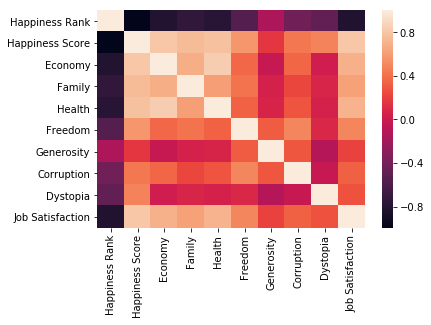

In [256]:
# 1st alternative
sns.heatmap(df.corr());

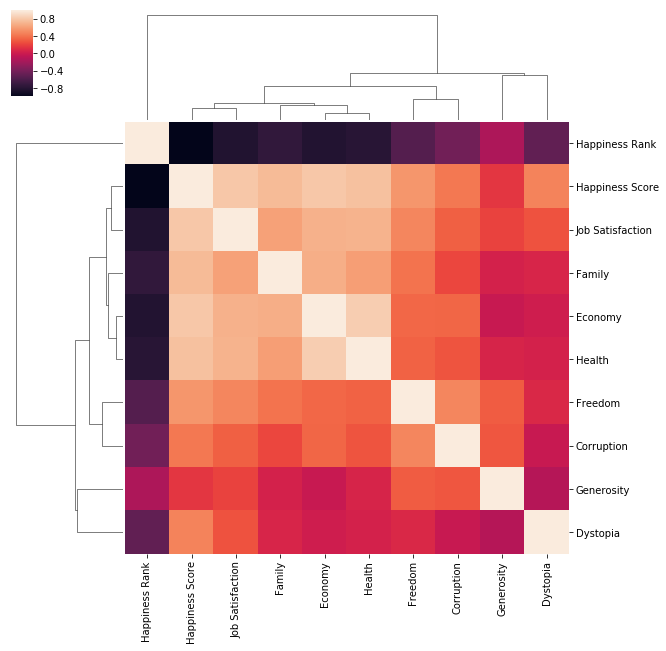

In [257]:
# 2nd alternative
sns.clustermap(df.corr());

## G. Probabilities

1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

I will apply Bayes' Theorem in order to solve this problem

Bayes'Theorem: $p(B|A) = [p(A|B)*p(B)]/p(A)$

A = Happiness Score of countries over 6

B = Countries from Western Europe

In [36]:
A = df.loc[df['Happiness Score'] > 6, 'Region'].count()

In [37]:
# p(A): dividing A through total number of countries (=A/151) = p(A)

p_A = A/df.loc[:,'Region'].count()

In [38]:
B = df.loc[df['Region'] == 'Western Europe', 'Region'].count()

In [39]:
# p(B): dividing B through total number of countries (=B/151) = p(B)

p_B = B/df.loc[:,'Region'].count()

In [40]:
# p(A|B): dividing number of total "Western Europe" countries with score > 6 through B

p_A_B = (df.loc[(df['Region'] == 'Western Europe') & (df['Happiness Score'] > 6), 'Region'].count())/B

In [41]:
# applying Bayes'Theorem: p(B|A) = [p(A|B)*p(B)]/p(A)

p_B_A = (p_A_B*p_B)/p_A

In [42]:
p_B_A

0.3863636363636364

The probability that a country is from Western Europe, knowing that its Happiness Score is over 6 is **0.38**

## H. Matrices

Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 
$0
/
1$
 values where entry 
$(
i
,
j
)$
 is a 
$1$
 if the country in row 
$i$
 is in the region in column 
$j$
 and a 
$0$
 otherwise.

In [43]:
df_H = pd.read_csv('data.csv')

In [44]:
df_H.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America


In [45]:
df_H.dropna(inplace=True)

In [46]:
df_H['Country_Region'] = df_H['Country'] + " " + df_H['Region']

In [47]:
df_H.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region,Country_Region
0,Malta,27,6.527,1.343280,1.488412,0.821944,0.588767,0.574731,0.153066,1.556863,85.2,Western Europe,Malta Western Europe
1,Zimbabwe,138,3.875,0.375847,1.083096,0.196764,0.336384,0.189143,0.095375,1.597970,56.3,Africa,Zimbabwe Africa
2,Cyprus,65,5.621,1.355938,1.131363,0.844715,0.355112,0.271254,0.041238,1.621249,88.7,Eastern Europe,Cyprus Eastern Europe
3,Iran,108,4.692,1.156873,0.711551,0.639333,0.249323,0.387243,0.048761,1.498735,70.3,Asia-Pacific,Iran Asia-Pacific
4,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155,82.4,Latin America,Mexico Latin America


In [178]:
unique_countries = df_H.Country.unique()
unique_regions = df_H.Region.unique()

In [179]:
n_rows = len(unique_countries)  # len(set(df.Country))
n_columns = len(unique_regions)

In [180]:
M = np.zeros(shape=(n_rows, n_columns))

In [181]:
df_H[df_H['Country'] == 'Malta'].Region[0]

'Western Europe'

In [233]:
for row_index, row_associated_country in enumerate(unique_countries):
    country_region = df_H[df_H['Country'] == row_associated_country].Region.iloc[0] # how to find the region if I know the country? (here row_associated_country)
    for column_index, column_associated_region in enumerate(unique_regions):
        if country_region == column_associated_region:  # are the two regions the same?
            M[row_index,column_index] = 1

In [234]:
M

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])